## **STAT448 Assignment 3**
By Amanda Pullan & Grey Harris

Using the code of the recent labs (on training articial neural networks in Keras), train several networks with different settings on this dataset. Overall, try to train up to 10 different congurations. Write a short report (up to 5 pages max) describing what effect different settings had on test accuracy and training process overall. For example, try different learning rates, optimisers, batch sizes and architectures.

In [ ]:
# setup - copied from Lab 9
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

from __future__ import print_function
from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import *
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# datasets to choose from
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# finding image vector size
image_size = (x_train.shape[1], x_train.shape[2])
image_vector_size = image_size[0] * image_size[1] # 28 * 28

# reshaping input data
x_train = x_train.reshape(x_train.shape[0], image_vector_size) /255.
x_test = x_test.reshape(x_test.shape[0], image_vector_size) /255.

In [ ]:
# fashion_mnist has 10 classes
num_classes = 10

# one hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Architecture

To compare the result of using different architectures, two different models were implemented. These included a basic model and deeper model with an additional hidden layer. Both of these were constructed using the Sequential model, which allows layers to be added on top of each other to create deep networks. Dense layers were used in the models to build fully connected networks. 

The basic model has one hidden layer containing 32 nodes and an output layer with 64 nodes. The hidden layer used sigmoid activation and the output layer used softmax.  
  
The deeper model used an extra hidden layer to improve its performance. Both hidden layers used sigmoid activation, with the first containing 64 nodes and the second containing 32 nodes. The output layer used softmax activation with 64 nodes.

## Optimisers

Two different optimisation algorithms were used with each model - Stochastic gradient descent (SGD) and Adam. The SGD method uses a fixed learning rate, while Adam has an adaptive learning rate and uses historical gradients to update weights more efficiently.

## Batch size

Changing the batch size also affects how the model learns. 

## Learning rate



In [ ]:
# basic model architecture

def build_basic_model():
  model = Sequential()

  # The input layer requires the special input_shape parameter which should match
  # the shape of our training data.
  model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model
  
# SGD with different batch sizes
basic_model_sgd = build_basic_model()
basic_model_sgd.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
basic_sgd1 = basic_model_sgd.fit(x_train, y_train, batch_size=128, epochs=50, verbose=False, validation_split=.1)
basic_sgd2 = basic_model_sgd.fit(x_train, y_train, batch_size=256, epochs=50, verbose=False, validation_split=.1)

# Adam with different batch sizes
basic_model_adam = build_basic_model()
basic_model_adam.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
basic_adam1 = basic_model_adam.fit(x_train, y_train, batch_size=128, epochs=50, verbose=False, validation_split=.1)
basic_adam2 = basic_model_adam.fit(x_train, y_train, batch_size=256, epochs=50, verbose=False, validation_split=.1)

# Adam with adjusted learning rate
basic_model_sgd_lr = build_basic_model()
basic_model_sgd_lr.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
basic_sgd_lr = basic_model_sgd_lr.fit(x_train, y_train, batch_size=128, epochs=50, verbose=False, validation_split=.1)

In [ ]:
# deeper model architecture

def build_deeper_model():
  model = Sequential()
  model.add(Dense(units=64, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dense(units=32, activation='sigmoid'))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

# SGD with different batch sizes
deeper_model_sgd = build_deeper_model()
deeper_model_sgd.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
deeper_sgd1 = deeper_model_sgd.fit(x_train, y_train, batch_size=128, epochs=50, verbose=False, validation_split=.1)
deeper_sgd2 = deeper_model_sgd.fit(x_train, y_train, batch_size=256, epochs=50, verbose=False, validation_split=.1)

# Adam with different batch sizes
deeper_model_adam = build_deeper_model()
deeper_model_adam.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
deeper_adam1 = deeper_model_adam.fit(x_train, y_train, batch_size=128, epochs=50, verbose=False, validation_split=.1)
deeper_adam2 = deeper_model_adam.fit(x_train, y_train, batch_size=256, epochs=50, verbose=False, validation_split=.1)

# Adam with adjusted learning rate
deeper_model_sgd_lr = build_deeper_model()
deeper_model_sgd_lr.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
deeper_sgd_lr = deeper_model_sgd_lr.fit(x_train, y_train, batch_size=128, epochs=50, verbose=False, validation_split=.1)

In [ ]:
# plot loss and accuracy

def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

# loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
# plot_loss_accuracy(history)
# print(f'Test loss: {loss:.3}')
# print(f'Test accuracy: {accuracy:.3}')

<Figure size 576x432 with 0 Axes>

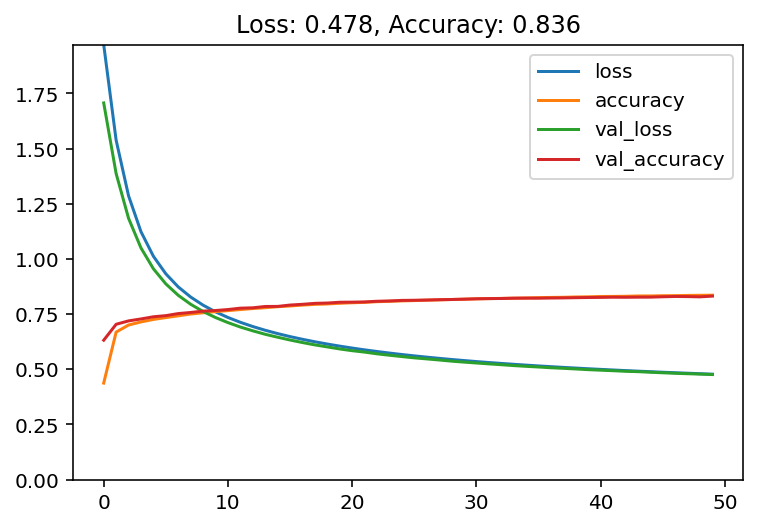

In [ ]:
plot_loss_accuracy(basic_sgd1)


<Figure size 576x432 with 0 Axes>

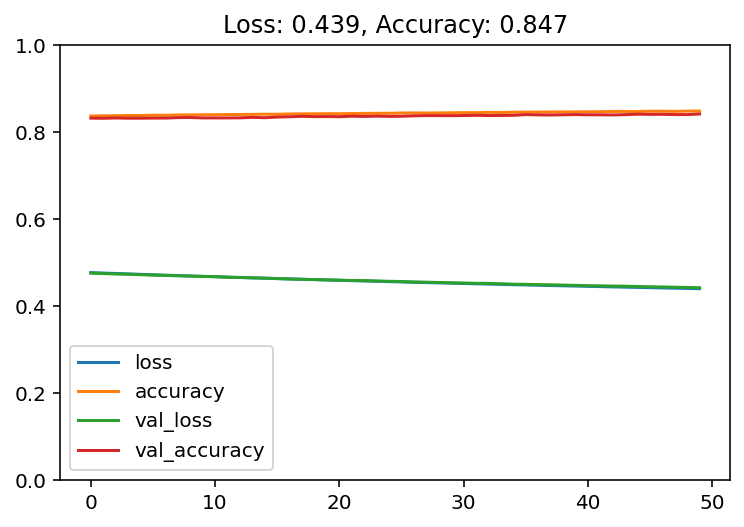

In [ ]:
plot_loss_accuracy(basic_sgd2)


<Figure size 576x432 with 0 Axes>

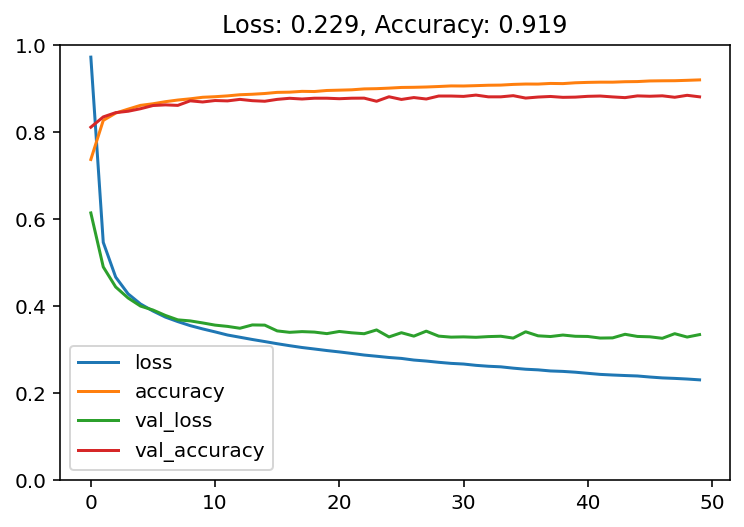

In [ ]:
plot_loss_accuracy(basic_adam1)


<Figure size 576x432 with 0 Axes>

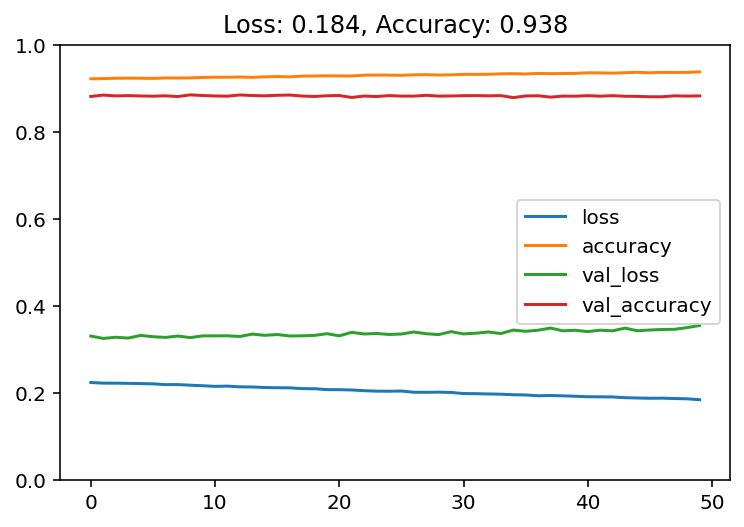

In [ ]:
plot_loss_accuracy(basic_adam2)


<Figure size 576x432 with 0 Axes>

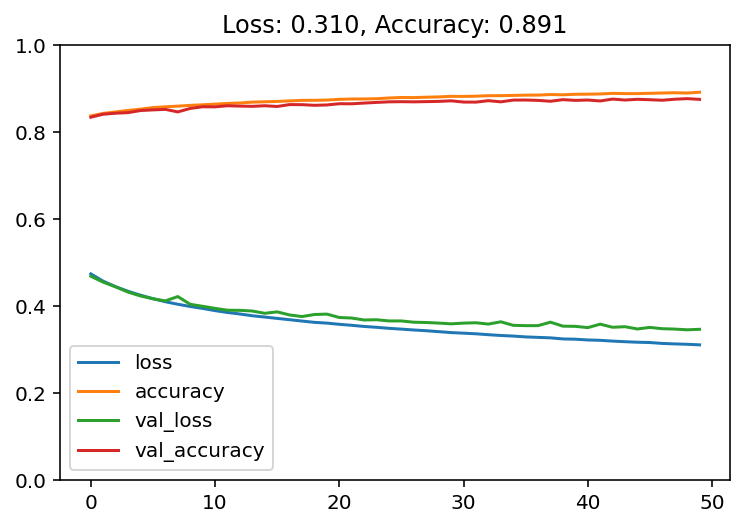

In [ ]:
basic_model_sgd_lr.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
basic_sgd_lr = basic_model_sgd_lr.fit(x_train, y_train, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_loss_accuracy(basic_sgd_lr)

deeper_model_sgd_lr = build_deeper_model()
deeper_model_sgd_lr.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
deeper_sgd_lr = deeper_model_sgd_lr.fit(x_train, y_train, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_loss_accuracy(deeper_sgd_lr)


<Figure size 576x432 with 0 Axes>

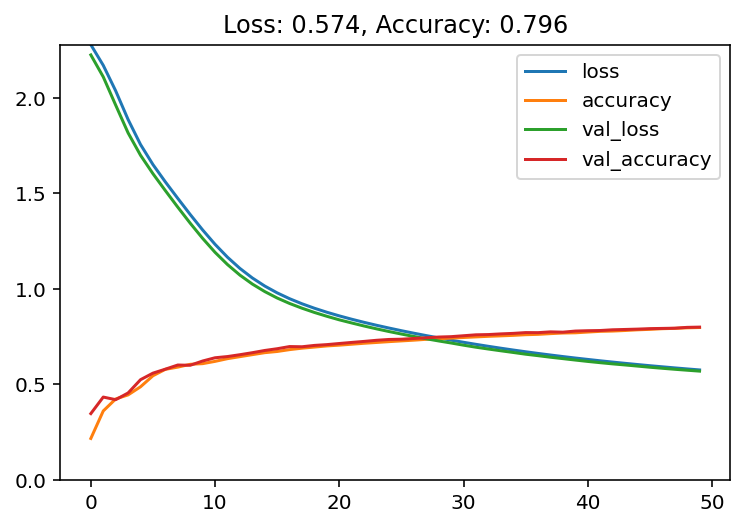

In [ ]:
plot_loss_accuracy(deeper_sgd1)


<Figure size 576x432 with 0 Axes>

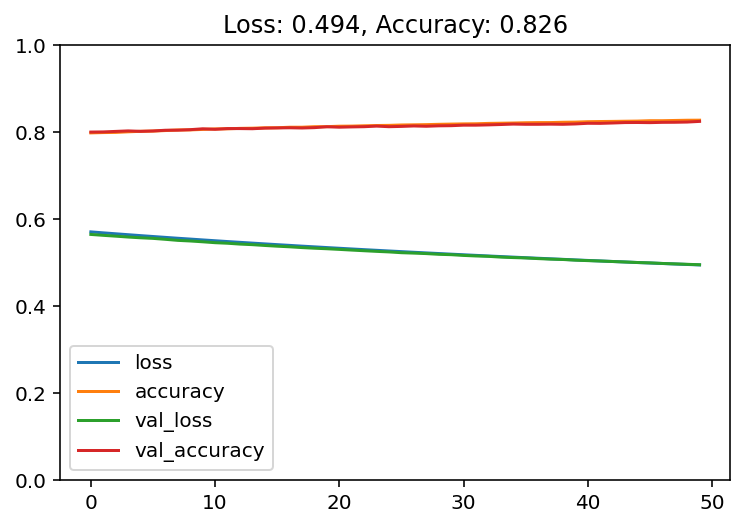

In [ ]:
plot_loss_accuracy(deeper_sgd2)


<Figure size 576x432 with 0 Axes>

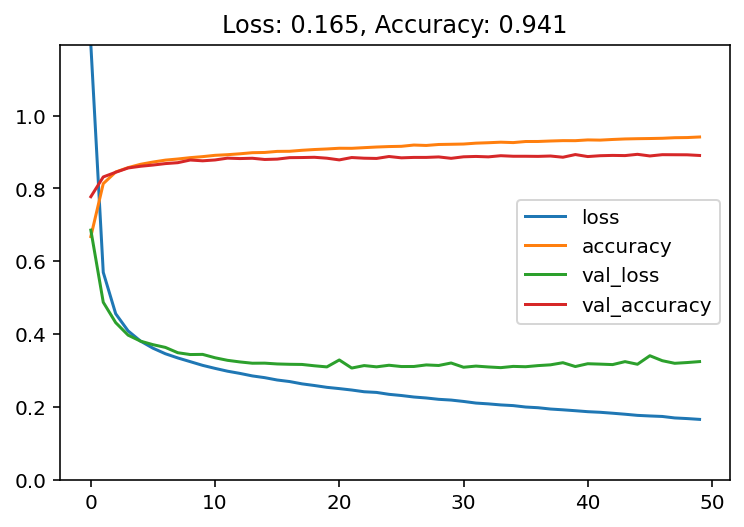

In [ ]:
plot_loss_accuracy(deeper_adam1)


<Figure size 576x432 with 0 Axes>

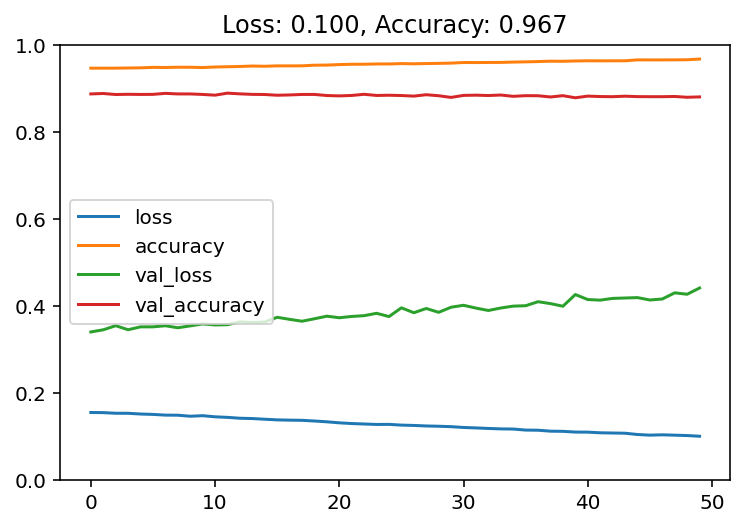

In [ ]:
plot_loss_accuracy(deeper_adam2)


<Figure size 576x432 with 0 Axes>

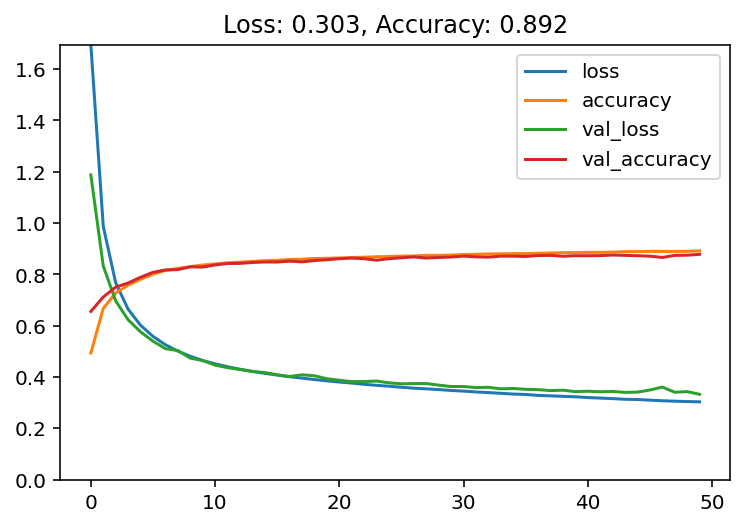

In [ ]:
deeper_model_sgd_lr = build_deeper_model()
deeper_model_sgd_lr.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
deeper_sgd_lr = deeper_model_sgd_lr.fit(x_train, y_train, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_loss_accuracy(deeper_sgd_lr)


In [ ]:
# define different architectures

#batch_size=32, dropout=0.2, learning_rate=0.1

def build_basic_model():
  model = Sequential()
  model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dense(units=64, activation='softmax'))
  return model

def batch_sizes():
  """made to test different batch sizes"""
  model = Sequential()
  model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dense(units=64, activation='softmax'))
  return model

def build_dropout_model(dropout=0.1):
  model = Sequential()
  model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dropout(dropout))
  model.add(Dense(units=64, activation='softmax'))
  return model

def build_deeper_model(layers=1):
  count = layers
  model = Sequential()
  while count >= 0:
      model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
      model.add(Dense(units=64, activation='softmax'))
      count = count - 1
  return model

#def learning_rate_model(learning_rate=0.1):
#  model = Sequential()
#  model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
#  model.add(Dense(units=64, activation='softmax'))
#  return model

def combination_model(layers=1, dropout=0.1):
  """combination of all tested ideas"""
  count = layers
  model = Sequential()
  while count >= 0:
    model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
    model.add(Dropout(dropout))
    model.add(Dense(units=64, activation='softmax'))
    count = count - 1
  return model


basic_model = build_basic_model() # basic ground truth model
double_batches = build_basic_model() # to be batched twice basic
eight_batches = build_basic_model() # to be batched 8 times basic
dropout_model_small_1 = build_dropout_model(dropout=0.1)   #dropout model with 10% drop rate
dropout_model_large_5 = build_dropout_model(dropout=0.5)   #dropout model with 50% drop rate
deeper_model_2 = build_deeper_model(layers=2) # 2 times the layers in base model 
deeper_model_8 = build_deeper_model(layers=8) # 8 times the layers in base model
#learning_rate_low_01 = learning_rate_model(learning_rate=0.01) # low learning rate 1%
#learning_rate_high_5 = learning_rate_model(learning_rate=0.5) # high learning rate 50%
combination_model_a = combination_model(layers=2, dropout=0.1) # model combining all the ideas tested
combination_model_b = combination_model(layers=2, dropout=0.5)
combination_model_c = combination_model(layers=8, dropout=0.1) # model combining all the ideas tested

print("Basic Model Summary:")
basic_model.summary()

print("double_batches Model Summary:")
double_batches.summary()

print("eight_batches Model Summary:")
eight_batches.summary()

print("Dropout Model with 10% drop rate:")
dropout_model_small_1.summary()

print("Dropout Model with 50% drop rate:")
dropout_model_large_5.summary()

print("Deeper Model 2 Summary:")
deeper_model_2.summary()

print("Deeper Model 8 Summary:")
deeper_model_8.summary()

print("Combination Model layers=1, dropout=0.1 Summary:")
combination_model_a.summary()

print("Combination Model layers=2, dropout=0.5 Summary:")
combination_model_b.summary()

print("Combination Model layers=8, dropout=0.1 Summary:")
combination_model_c.summary()


Basic Model Summary:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
Total params: 27,232
Trainable params: 27,232
Non-trainable params: 0
_________________________________________________________________
double_batches Model Summary:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
Total params: 27,232
Trainable params: 27,232
Non-trainable params: 0
_________________________________________

In [ ]:
# plot loss and accuracy

def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
plot_loss_accuracy(history)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')